## Decision Tree Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def safelog2(x):
    if x == 0:
        return(0)
    else:
        return(np.log2(x))

## Importing Data

In [2]:
# importing the data to train and test sets

dataset_train = np.array(np.genfromtxt(
    "hw05_data_set_train.csv", delimiter=","))
dataset_test = np.array(np.genfromtxt("hw05_data_set_test.csv", delimiter=","))

x_train_dataset = np.array(dataset_train[:, 0])
y_train_dataset = np.array(dataset_train[:, 1])
x_test_dataset = np.array(dataset_test[:, 0])
y_test_dataset = np.array(dataset_test[:, 1])

min_val = min(x_train_dataset)
max_val = max(x_train_dataset)

# get numbers of train and test samples
N_train = len(y_train_dataset)
N_test = len(y_test_dataset)

## Tree Inference

In [3]:
def dec_tree(x_train_dataset, y_wait_train_dataset, P):    
    
    # create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}
    node_splits = {}
    node_means = {}

    # put all training instances into the root node
    node_indices[1] = np.array(range(len(x_train_dataset)))
    is_terminal[1] = False
    need_split[1] = True

    #print(node_indices)
    #print(is_terminal)
    #print(need_split)
    
    # learning algorithm

    while True:
        # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items() if value == True]

        # check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break

        # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            node_mean = np.mean(y_train_dataset[data_indices])

            # pre-pruning
            if x_train_dataset[data_indices].size <= P:   # P value will be initialized in the latter stages.
                is_terminal[split_node] = True
                node_means[split_node] = node_mean

            else:
                is_terminal[split_node] = False
                x_sort_un = np.sort(np.unique(x_train_dataset[data_indices]))
                split_positions = 0.5 * (x_sort_un[1:len(x_sort_un)] + x_sort_un[0:(len(x_sort_un) - 1)])
                split_scores = np.repeat(0.0,len(split_positions))

                for s in range(len(split_positions)):
                        left_indices = data_indices[x_train_dataset[data_indices] < split_positions[s]]
                        right_indices = data_indices[x_train_dataset[data_indices] >= split_positions[s]]
                        err = 0
                        if len(left_indices) > 0:
                            err += np.sum((y_wait_train_dataset[left_indices] - np.mean(y_wait_train_dataset[left_indices])) ** 2)  # using mean square error formula
                        if len(right_indices) > 0:
                            err += np.sum((y_wait_train_dataset[right_indices] - np.mean(y_wait_train_dataset[right_indices])) ** 2)
                        split_scores[s] = err / (len(left_indices) + len(right_indices))

                if len(x_sort_un) == 1 :
                    is_terminal[split_node] = True
                    node_means[split_node] = node_mean
                    continue

                best_split = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_split

                # create left node using the selected split
                left_indices = data_indices[x_train_dataset[data_indices] < best_split]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True

                # create right node using the selected split
                right_indices = data_indices[x_train_dataset[data_indices] >= best_split]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
                
    return node_splits,node_means,is_terminal

In [4]:
def predict(x, node_splits, node_means, is_terminal):
    index = 1 
    while 1:
        if is_terminal[index] == True:
            return node_means[index]
        if x > node_splits[index]:
            #right child (for example 2 --> 5)
            index = index*2 + 1
        else:
            #left child (for example 2 --> 4)
            index = index*2

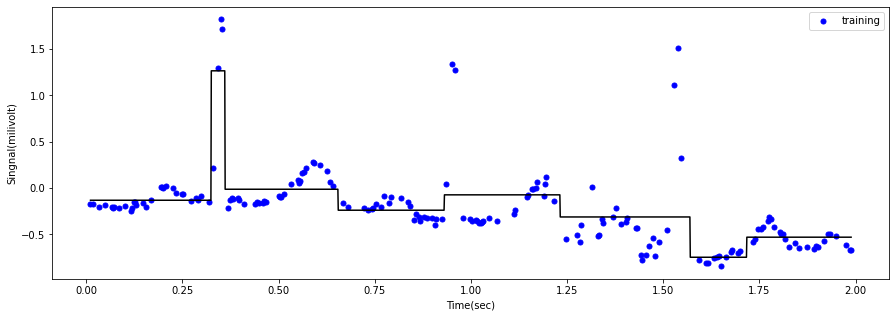

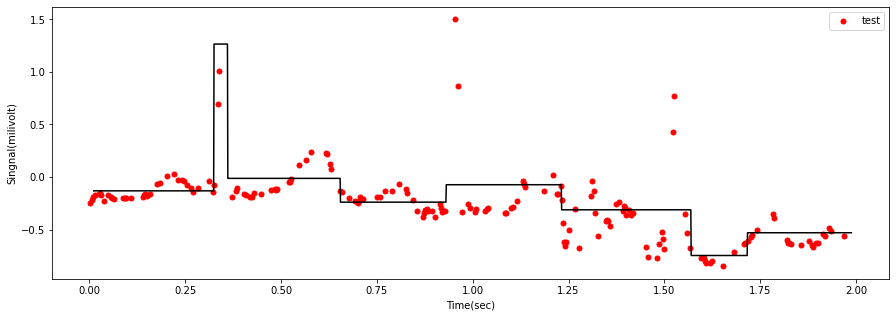

In [5]:
P = 30 # given in the .pdf description file
node_splits, node_means, is_terminal = dec_tree(x_train_dataset, y_train_dataset, P)


# prediction for test data
pred = [predict(x, node_splits, node_means, is_terminal) for x in x_test_dataset]
pred= np.array(pred)

data_interval = np.arange(min_val, max_val, 0.001)
fig = plt.figure(figsize = (15,5))
plt.plot(x_train_dataset, y_train_dataset, "b.", markersize = 10, label="training")
int_plot=[]

for i in range(len(data_interval)):
    int_plot.append(predict(data_interval[i],node_splits,node_means,is_terminal))

plt.plot(data_interval,int_plot,color="black")
plt.xlabel("Time(sec)")
plt.ylabel("Singnal(milivolt)")
plt.legend(loc="upper right")
plt.show()


fig = plt.figure(figsize = (15,5))
plt.plot(x_test_dataset, y_test_dataset, "r.", markersize = 10, label="test")
int_plot=[]

for i in range(len(data_interval)):
    int_plot.append(predict(data_interval[i],node_splits,node_means,is_terminal))
    
plt.plot(data_interval,int_plot,color="black")
plt.xlabel("Time(sec)")
plt.ylabel("Singnal(milivolt)")
plt.legend(loc="upper right")
plt.show()


In [6]:
# calculate and print rmse

# def for rmse
def rmse(set, pred):
    return np.sqrt(sum((set - pred) ** 2) / len(set))

# prediction for train data
pred2 = [predict(x, node_splits, node_means, is_terminal) for x in x_train_dataset]

rmse_train = rmse(y_train_dataset, pred2)
rmse_test = rmse(y_test_dataset, pred)

print("RMSE on training set is", rmse_train, "when P is",  P)
print("RMSE on test set is", rmse_test, "when P is",  P)

RMSE on training set is 0.28819293428018844 when P is 30
RMSE on test set is 0.22542236010134892 when P is 30


## Training Performance

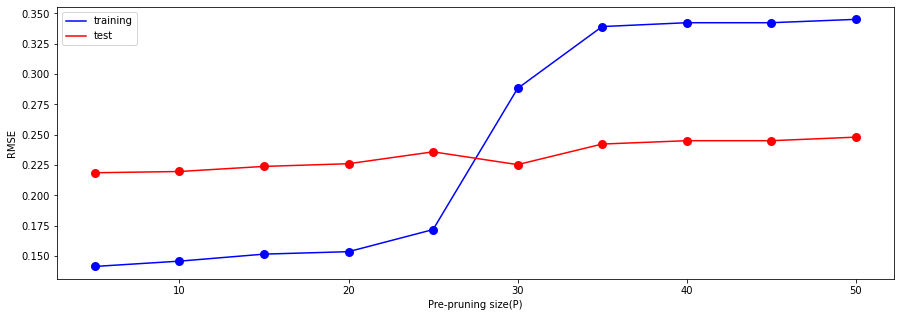

In [7]:
rmse_val_test = []
rmse_val_train = []

for P in range(5,55,5):
    node_splits, node_means, is_terminal = dec_tree(x_train_dataset, y_train_dataset, P)
    
    pred = np.array([predict(x,node_splits,node_means,is_terminal) for x in x_test_dataset])
    rmse_val_test.append(rmse(y_test_dataset, pred))
    
    pred2 = np.array([predict(x,node_splits,node_means,is_terminal) for x in x_train_dataset])
    rmse_val_train.append(rmse(y_train_dataset, pred2))
    
    
rmse_val_arr_test = np.array(rmse_val_test)
rmse_val_arr_train = np.array(rmse_val_train)

fig = plt.figure(figsize=(15,5))

plt.plot(range(5,55,5), rmse_val_train, color = "blue", label="training")  # uses P values 5,10,15,...,50
plt.scatter(range(5,55,5), rmse_val_train, color = "blue", linewidths=3) 

plt.plot(range(5,55,5), rmse_val_test, color = "red", label="test")  # uses P values 5,10,15,...,50
plt.scatter(range(5,55,5), rmse_val_test, color = "red", linewidths=3) 

plt.xlabel("Pre-pruning size(P)")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.show()